In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pyttsx3
engine = pyttsx3.init()
subjects = (" ", "Ramesh", "Vikas", "Mr_Trump", "Mr_Obama","Anirudh","Anirudh")

In [2]:
def detect_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('opencv-files/lbpcascade_frontalface.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);
    if (len(faces) == 0):
        return None, None
    (x, y, w, h) = faces[0]
    return gray[y:y+w, x:x+h], faces[0]

def prepare_training_data(data_folder_path):
    dirs = os.listdir(data_folder_path)
    faces = [];    labels = []
    for dir_name in dirs:
        if not dir_name.startswith("s"):
            continue;
        label = int(dir_name.replace("s", ""))
        subject_dir_path = data_folder_path + "/" + dir_name
        subject_images_names = os.listdir(subject_dir_path)
        for image_name in subject_images_names:
            if image_name.startswith("."):
                continue;
            image_path = subject_dir_path + "/" + image_name
            image = cv2.imread(image_path)
            cv2.imshow("Training on image...", image)
            cv2.waitKey(100)
            face, rect = detect_face(image)
            if face is not None:
                #add face to list of faces
                faces.append(face)
                #add label for this face
                labels.append(label)
            
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    return faces, labels

def draw_rec(img,rect):
    (x,y,w,h)=rect
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
def draw_text(img, text,x,y):
    cv2.putText(img,text,(x,y), cv2.FONT_HERSHEY_PLAIN,1.5,(0,255,0),2)

def predict(test_img):
    img=test_img.copy()
    face,rect=detect_face(img)
    label=face_algo.predict(face)
    draw_rec(img,rect)
    label_text=subjects[label[0]]
    draw_text(img, label_text, rect[0], rect[1])
    path='bio'+'/'+label_text+'/'+'bio'
    x=open(path, 'r')
    with open(path) as f:
        lines = f.readlines()
    engine.say(lines)
    engine.runAndWait()
    engine.runAndWait()
    print (x.read())
    return img

faces, labels = prepare_training_data("training-data")

#print total faces and labels
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

face_algo=cv2.face.LBPHFaceRecognizer_create()
#face_algo = cv2.face.EigenFaceRecognizer_create()
#face_recognizer = cv2.face.FisherFaceRecognizer_create()

face_algo.train(faces, np.array(labels))

test_img1=cv2.imread("test-data/test1.jpg")
test_img2=cv2.imread("test-data/test2.jpg")


Total faces:  70
Total labels:  70


Hello Ramesh, Howz your Machine Learning project coming up? I heard that you had to visit dentist for some reason, how are you doing now with it? 



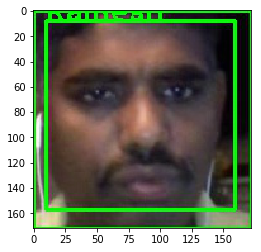

Hello Vikas, how is your stay at Raleigh going? Seems its getting cold there, take good care of yourself.



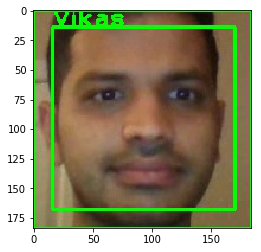

Hello Mr. Trump, Howz your Asia tour coming up? I wish you good luck for your travel abroad. 



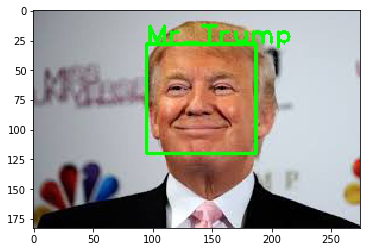

Hello Mr. Obama, Have are you feeling after serving as a president? You must be enjoying your time now, I hope to see you sometime. You look so young. 



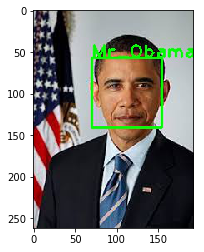

Hello little boy, how are you today?



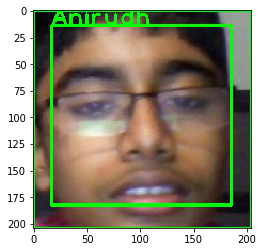

In [9]:
predict_img1=predict(test_img1)

cv2.imwrite('im.jpg',predict_img1)
img=cv2.imread('im.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # For some reason cv2.imread revereses i.e. gives BRG
plt.imshow(rgb_img)
plt.show()

predict_img2=predict(test_img2)
cv2.imwrite('im.jpg',predict_img2)
img=cv2.imread('im.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # For some reason cv2.imread revereses i.e. gives BRG
plt.imshow(rgb_img)
plt.show()

test_img3=cv2.imread("test-data/test3.jpg")
predict_img3=predict(test_img3)

cv2.imwrite('im.jpg',predict_img3)
img=cv2.imread('im.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # For some reason cv2.imread revereses i.e. gives BRG
plt.imshow(rgb_img)
plt.show()

test_img4=cv2.imread("test-data/test4.jpg")
predict_img4=predict(test_img4)

cv2.imwrite('im.jpg',predict_img4)
img=cv2.imread('im.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # For some reason cv2.imread revereses i.e. gives BRG
plt.imshow(rgb_img)
plt.show()

test_img6=cv2.imread("test-data/test6.jpg")
predict_img6=predict(test_img6)

cv2.imwrite('im.jpg',predict_img6)
img=cv2.imread('im.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # For some reason cv2.imread revereses i.e. gives BRG
plt.imshow(rgb_img)
plt.show()